# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities

['bafq',
 'vaitupu',
 'lebu',
 'carnarvon',
 'yellowknife',
 'lompoc',
 'punta arenas',
 'hobyo',
 'bethel',
 'mataura',
 'kaitangata',
 'butaritari',
 'hobart',
 'luderitz',
 'hambantota',
 'rikitea',
 'esperance',
 'belushya guba',
 'bud',
 'baudh',
 'jasper',
 'alyangula',
 'taloda',
 'fontenay-le-comte',
 'puerto ayora',
 'taolanaro',
 'ponta do sol',
 'bredasdorp',
 'san patricio',
 'cayenne',
 'ushuaia',
 'makakilo city',
 'pisco',
 'saint-philippe',
 'kapaa',
 'chuy',
 'geraldton',
 'mys shmidta',
 'puerto escondido',
 'amderma',
 'acapulco',
 'hermanus',
 'ola',
 'castro',
 'bluff',
 'camacha',
 'mar del plata',
 'busselton',
 'lazarev',
 'bocas del toro',
 'khatanga',
 'qaanaaq',
 'antofagasta',
 'nizhneyansk',
 'katsuura',
 'new norfolk',
 'naze',
 'moron',
 'grand gaube',
 'barrow',
 'san quintin',
 'severobaykalsk',
 'souillac',
 'vaini',
 'warqla',
 'victoria',
 'vila velha',
 'buchanan',
 'georgetown',
 'albany',
 'provideniya',
 'monte patria',
 'hami',
 'anamur',
 'beyn

In [5]:
citiesdf=pd.DataFrame({'City':cities})
citiesdf.head()

,City
0,bafq
1,vaitupu
2,lebu
3,carnarvon
4,yellowknife


In [6]:
citiesdf['Cloudiness']=''
citiesdf['Country']=''
citiesdf['Date']=''
citiesdf['Humidity']=''
citiesdf['Lat']=''
citiesdf['Lng']=''
citiesdf['MaxTemp']=''
citiesdf['WindSpeed']=''

In [7]:
citiesdf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,bafq,,,,,,,,
1,vaitupu,,,,,,,,
2,lebu,,,,,,,,
3,carnarvon,,,,,,,,
4,yellowknife,,,,,,,,


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
endpoint=f'{url}appid={weather_api_key}&q={"Carnarvon"}&units=imperial'

In [9]:
endpoint

'http://api.openweathermap.org/data/2.5/weather?appid=ee784740e3f9553c5e0ac3d981b1838c&q=Carnarvon&units=imperial'

In [10]:
response1=requests.get(endpoint).json()
response1

{'coord': {'lon': 113.63, 'lat': -24.87},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 77,
  'feels_like': 66.25,
  'temp_min': 77,
  'temp_max': 77,
  'pressure': 1012,
  'humidity': 57},
 'visibility': 10000,
 'wind': {'speed': 25.28, 'deg': 200},
 'clouds': {'all': 0},
 'dt': 1603766283,
 'sys': {'type': 1,
  'id': 9505,
  'country': 'AU',
  'sunrise': 1603748473,
  'sunset': 1603795034},
 'timezone': 28800,
 'id': 2074865,
 'name': 'Carnarvon',
 'cod': 200}

In [11]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    'appid':weather_api_key,
    'units':'imperial',
}

results=[]


print('Beginning Data Retrieval \n-----------------------------')


# use iterrows to iterate through pandas dataframe
for index, row in citiesdf.iterrows():

    # get city type from df
    params['q']= {row['City']}

    
    print(f"Processing Record {index} of Set 1 | {row['City']}")
    response = requests.get(base_url,params=params).json()
    results.append(response)

    
    try:

        citiesdf.loc[index,'Cloudiness'] = results[index]['clouds']['all']
        citiesdf.loc[index, 'Country'] = results[index]['sys']['country']
        citiesdf.loc[index, 'Date'] = results[index]['dt']
        citiesdf.loc[index, 'Humidity'] = results[index]['main']['humidity']
        citiesdf.loc[index, 'Lat'] = results[index]['coord']['lat']
        citiesdf.loc[index, 'Lng'] = results[index]['coord']['lon']
        citiesdf.loc[index, 'MaxTemp'] = results[index]['main']['temp_max']
        citiesdf.loc[index, 'WindSpeed'] = results[index]['wind']['speed']
        
    except:
        print("City not found. Skipping...")
        
print("------------")
   
    

Beginning Data Retrieval 
-----------------------------
Processing Record 0 of Set 1 | bafq
Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | hobyo
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | hambantota
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | bud
Processing Record 19 of Set 1 | baudh
Processing Record 20 of Set 1 | jasper
Processing Record 21 of Set 1 | alyangula
Proce

Processing Record 186 of Set 1 | pachperwa
Processing Record 187 of Set 1 | dikson
Processing Record 188 of Set 1 | turukhansk
Processing Record 189 of Set 1 | evensk
Processing Record 190 of Set 1 | rocha
Processing Record 191 of Set 1 | maymanak
City not found. Skipping...
Processing Record 192 of Set 1 | barahona
Processing Record 193 of Set 1 | locri
Processing Record 194 of Set 1 | auki
Processing Record 195 of Set 1 | elat
Processing Record 196 of Set 1 | samarai
Processing Record 197 of Set 1 | sabla
Processing Record 198 of Set 1 | imbituba
Processing Record 199 of Set 1 | marawi
Processing Record 200 of Set 1 | george
Processing Record 201 of Set 1 | lata
Processing Record 202 of Set 1 | sept-iles
Processing Record 203 of Set 1 | elko
Processing Record 204 of Set 1 | kotido
Processing Record 205 of Set 1 | christchurch
Processing Record 206 of Set 1 | kandrian
Processing Record 207 of Set 1 | ono
Processing Record 208 of Set 1 | wajir
Processing Record 209 of Set 1 | viligili


Processing Record 370 of Set 1 | abyek
Processing Record 371 of Set 1 | karaul
City not found. Skipping...
Processing Record 372 of Set 1 | basco
Processing Record 373 of Set 1 | taksimo
Processing Record 374 of Set 1 | pudozh
Processing Record 375 of Set 1 | san felipe
Processing Record 376 of Set 1 | grand-santi
Processing Record 377 of Set 1 | yanggu
Processing Record 378 of Set 1 | tolaga bay
Processing Record 379 of Set 1 | dargaville
Processing Record 380 of Set 1 | salalah
Processing Record 381 of Set 1 | dauin
Processing Record 382 of Set 1 | namatanai
Processing Record 383 of Set 1 | pevek
Processing Record 384 of Set 1 | rodrigues alves
Processing Record 385 of Set 1 | nuevo progreso
Processing Record 386 of Set 1 | mahbubabad
Processing Record 387 of Set 1 | pallasovka
Processing Record 388 of Set 1 | gat
Processing Record 389 of Set 1 | juneau
Processing Record 390 of Set 1 | ewa beach
Processing Record 391 of Set 1 | russell
Processing Record 392 of Set 1 | san cristobal
P

Processing Record 557 of Set 1 | dingle
Processing Record 558 of Set 1 | omsukchan
Processing Record 559 of Set 1 | amapa
Processing Record 560 of Set 1 | north fort myers
Processing Record 561 of Set 1 | hirara
Processing Record 562 of Set 1 | kudahuvadhoo
Processing Record 563 of Set 1 | dongsheng
Processing Record 564 of Set 1 | sao joao da barra
Processing Record 565 of Set 1 | bintulu
Processing Record 566 of Set 1 | inuvik
Processing Record 567 of Set 1 | harper
Processing Record 568 of Set 1 | nanaimo
Processing Record 569 of Set 1 | dalhousie
Processing Record 570 of Set 1 | magadi
Processing Record 571 of Set 1 | marzuq
Processing Record 572 of Set 1 | kardla
Processing Record 573 of Set 1 | eregli
Processing Record 574 of Set 1 | satis
Processing Record 575 of Set 1 | isangel
Processing Record 576 of Set 1 | coihaique
Processing Record 577 of Set 1 | malanje
Processing Record 578 of Set 1 | abu samrah
Processing Record 579 of Set 1 | kyotera
Processing Record 580 of Set 1 | b

In [12]:
response

{'cod': '404', 'message': 'city not found'}

In [13]:
results

[{'coord': {'lon': 55.41, 'lat': 31.61},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 52.54,
   'feels_like': 47.7,
   'temp_min': 52.54,
   'temp_max': 52.54,
   'pressure': 1018,
   'humidity': 37,
   'sea_level': 1018,
   'grnd_level': 905},
  'visibility': 10000,
  'wind': {'speed': 1.07, 'deg': 174},
  'clouds': {'all': 0},
  'dt': 1603766284,
  'sys': {'country': 'IR', 'sunrise': 1603765825, 'sunset': 1603805626},
  'timezone': 12600,
  'id': 142255,
  'name': 'Bāfq',
  'cod': 200},
 {'cod': '404', 'message': 'city not found'},
 {'coord': {'lon': -73.65, 'lat': -37.62},
  'weather': [{'id': 502,
    'main': 'Rain',
    'description': 'heavy intensity rain',
    'icon': '10n'}],
  'base': 'stations',
  'main': {'temp': 51.15,
   'feels_like': 45.64,
   'temp_min': 51.15,
   'temp_max': 51.15,
   'pressure': 1016,
   'humidity': 87,
   'sea_level': 1016,
   'grnd_level': 1005},
  'visibi

In [14]:
citiesdf.dtypes

City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lng           object
MaxTemp       object
WindSpeed     object
dtype: object

In [15]:
citiesdf.count()

City          614
Cloudiness    614
Country       614
Date          614
Humidity      614
Lat           614
Lng           614
MaxTemp       614
WindSpeed     614
dtype: int64

In [16]:
citiesdf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,bafq,0,IR,1603766284,37,31.61,55.41,52.54,1.07
1,vaitupu,,,,,,,,
2,lebu,100,CL,1603766284,87,-37.62,-73.65,51.15,8.75
3,carnarvon,0,AU,1603766283,57,-24.87,113.63,77,25.28
4,yellowknife,90,CA,1603765936,79,62.46,-114.35,21.2,12.75


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#Export the city data into a .csv.
citiesdf.to_csv("city_table.csv",index_label='City_ID')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [18]:
citiesdf['Lat']=pd.to_numeric(citiesdf.Lat)
citiesdf['MaxTemp']=pd.to_numeric(citiesdf.MaxTemp)
citiesdf['Humidity']=pd.to_numeric(citiesdf.Humidity)
citiesdf['Cloudiness']=pd.to_numeric(citiesdf.Cloudiness)
citiesdf['WindSpeed']=pd.to_numeric(citiesdf.WindSpeed)

In [19]:
citiesdf.dtypes

City           object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng            object
MaxTemp       float64
WindSpeed     float64
dtype: object

In [20]:
Latitude=citiesdf['Lat']
Temperature=citiesdf['MaxTemp']
Humidity=citiesdf['Humidity']
Cloudiness=citiesdf['Cloudiness']
WindSpeed=citiesdf['WindSpeed']

In [ ]:
plt.scatter(Latitude,Temperature)
plt.title('Latitude vs. Temperature Plot')
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.savefig("Plots/Max_Temp_vs_Latitude.png")
plt.show()

Graph above shows that the temperature decreases in the poles (top and bottom lattitude)

#### Latitude vs. Humidity Plot

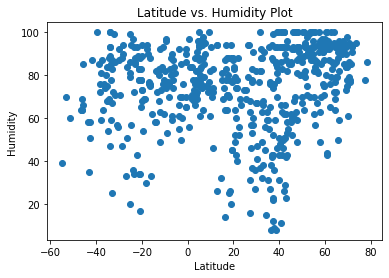

In [22]:
plt.scatter(Latitude,Humidity)
plt.title('Latitude vs. Humidity Plot')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.savefig("Plots/Latitude_vs_Humaidity.png")
plt.show()

Conclusion:
Latitude vs. Humidity Plot show there is more humidity on higher latitudes

#### Latitude vs. Cloudiness Plot

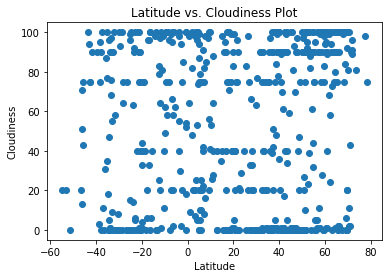

In [23]:
plt.scatter(Latitude,Cloudiness)
plt.title('Latitude vs. Cloudiness Plot')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.savefig("Plots/Latitude_vs_Cloudiness.png")
plt.show()

No conclusion found

#### Latitude vs. Wind Speed Plot

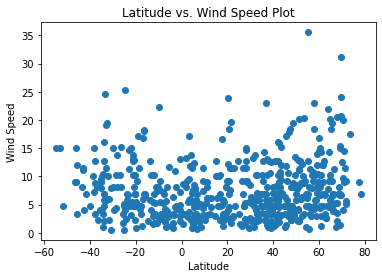

In [24]:
plt.scatter(Latitude,WindSpeed)
plt.title('Latitude vs. Wind Speed Plot')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.savefig("Plots/Max_Temp_vs_WindSpeed.png")
plt.show()

No conclusion found

## Linear Regression

In [25]:
# OPTIONAL: Create a function to create Linear Regression plots


In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = citiesdf.loc[citiesdf["Lat"]>0.01]
southern_hemisphere  = citiesdf.loc[citiesdf["Lat"]<-0.01]

In [27]:
southern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
2,lebu,100.0,CL,1603766284,87.0,-37.62,-73.65,51.15,8.75
3,carnarvon,0.0,AU,1603766283,57.0,-24.87,113.63,77.00,25.28
6,punta arenas,20.0,CL,1603765836,70.0,-53.15,-70.92,42.80,14.99
9,mataura,71.0,NZ,1603765931,64.0,-46.19,168.86,57.00,8.99
10,kaitangata,13.0,NZ,1603766285,69.0,-46.28,169.85,53.01,15.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

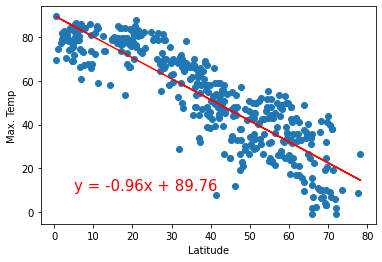

In [28]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['MaxTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")

plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")

plt.savefig("Plots/Northern_Hemisphere Max Temp vs. Latitude Linear Regression.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

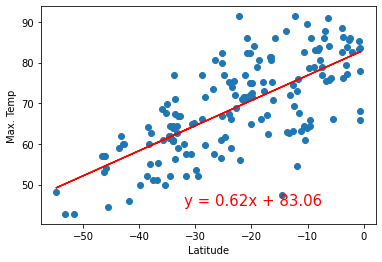

In [29]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['MaxTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")

plt.annotate(line_eq,(-32,45),fontsize=15,color="red")

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")

plt.savefig("Plots/Southern_Hemisphere Max Temp vs. Latitude Linear Regression.png")
plt.show()


Tempeatures get high as they get close to 0 (ecuador)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

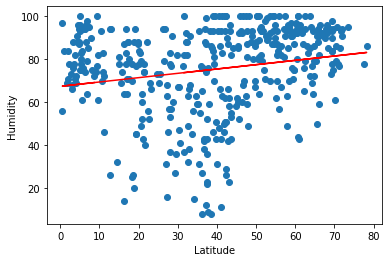

In [30]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")

plt.annotate(line_eq,(5,2),fontsize=15,color="red")

plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig("Plots/Northern_Hemisphere Humidity vs. Latitude Linear Regression.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

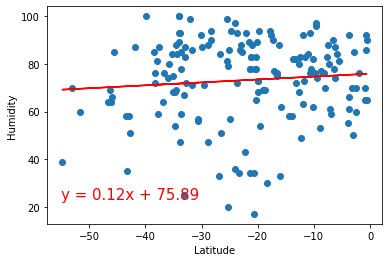

In [31]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")

plt.annotate(line_eq,(-55,23),fontsize=15,color="red")

plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig("Plots/Southern_Hemisphere Humidity vs. Latitude Linear Regression.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

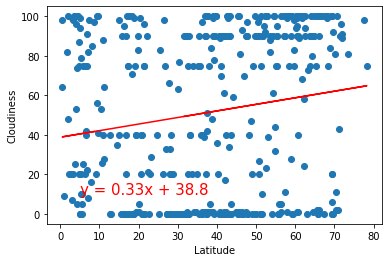

In [32]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")

plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig("Plots/Northern_Hemisphere Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

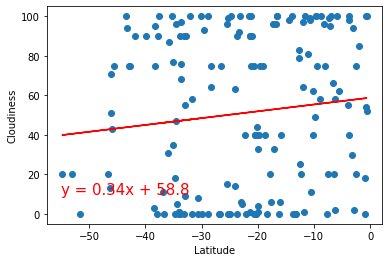

In [33]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")

plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig("Plots/Southern_Hemisphere Cloudiness vs. Latitude Linear Regression.png")
plt.show()

Clousiness regression looks pretty similar

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

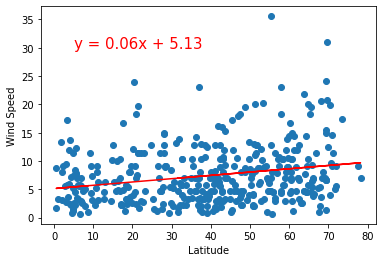

In [34]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")

plt.annotate(line_eq,(5,30),fontsize=15,color="red")

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.savefig("Plots/Northern_Hemisphere WindSpeed vs. Latitude Linear Regression.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

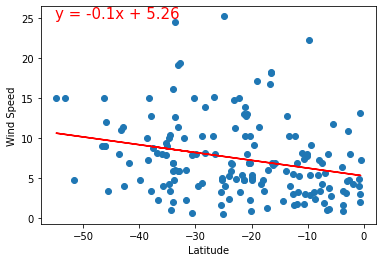

In [35]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")

plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.savefig("Plots/Southern_Hemisphere WindSpeed vs. Latitude Linear Regression.png")
plt.show()